# Reprojecting PyVista Mesh to Different Map Projections

In [1]:
import pyvista as pv

from pv_utils import mesh_from_nc, project_mesh

In [2]:
# Create Pyvista mesh from a netcdf file.
mesh = mesh_from_nc(fname='qrclim.sst.ugrid.nc', data_type='real')

# Reproject the mesh from platecarree to a mollweide projection.
moll_mesh = project_mesh(mesh, 'moll')

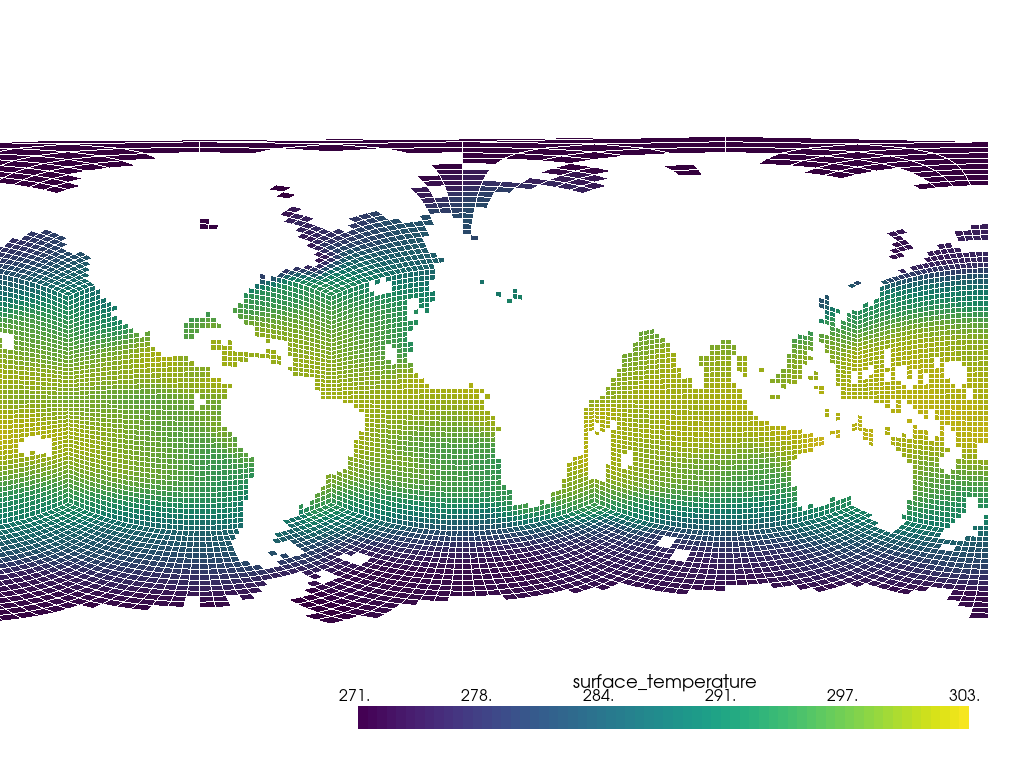

In [3]:
# Plot the original Plate Carree projection.
p = pv.Plotter()
p.add_mesh(mesh,
           show_edges=True, edge_color='white', line_width=0.5,
           scalar_bar_args=dict(color='black', label_font_size=16,
                                n_labels=6, title_font_size=18))
p.background_color = 'white'
p.camera_position = [(16.869657976834926, 5.235398397963124, 490.2717016329161),
                     (16.869657976834926, 5.235398397963124, 0.0),
                     (0.0, 1.0, 0.0)]
p.show()

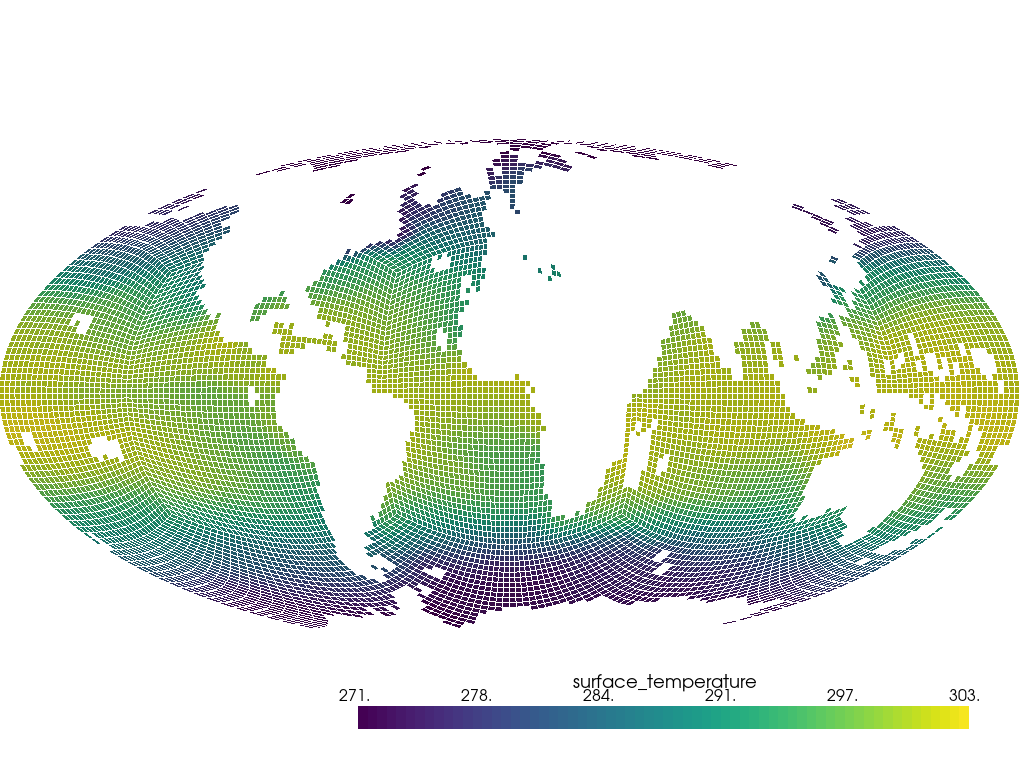

In [4]:
# Plot the Mollweide projection.
p = pv.Plotter()
p.add_mesh(moll_mesh,
           show_edges=True, edge_color='white', line_width=0.5,
           scalar_bar_args=dict(color='black', label_font_size=16,
                                n_labels=6, title_font_size=18))
p.background_color = 'white'
p.camera_position = [(93959.85410932079, 328636.4707611543, 50654659.22149858),
                     (93959.85410932079, 328636.4707611543, 0.0),
                     (0.0, 1.0, 0.0)]
p.show()

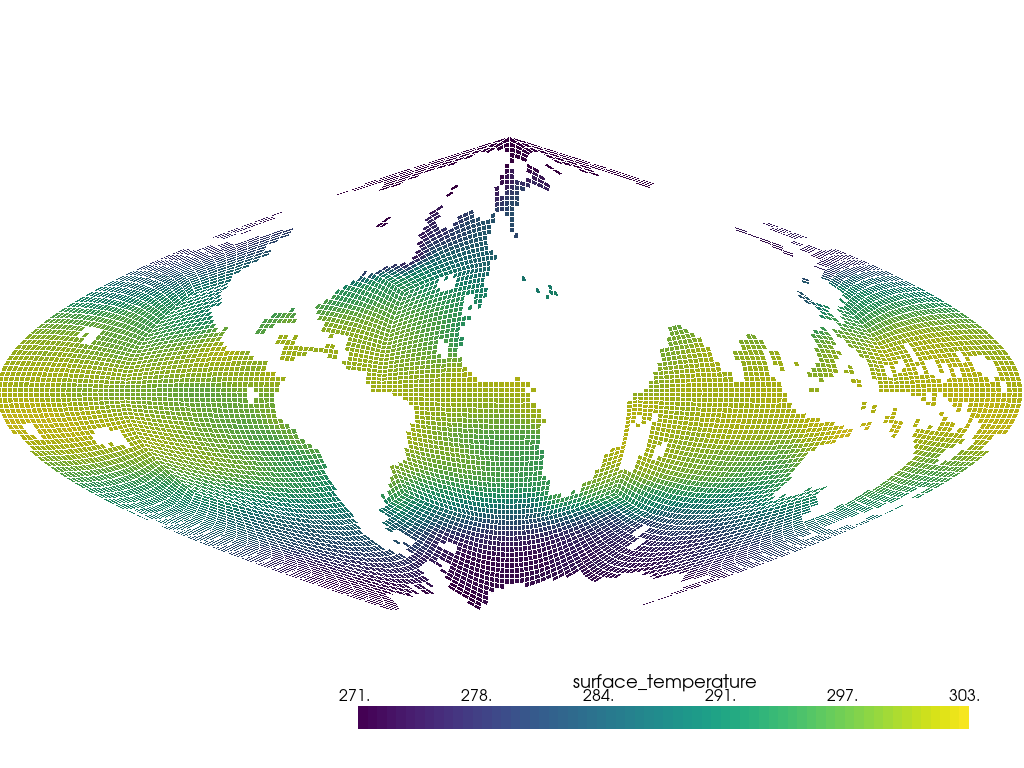

In [5]:
# Reproject the mesh from platecarree to a sinusoidal projection.
sinu_mesh = project_mesh(mesh, 'sinu')

# Plot the sinusoidal projection.
p = pv.Plotter()
p.add_mesh(sinu_mesh,
           show_edges=True, edge_color='white', line_width=0.5,
           scalar_bar_args=dict(color='black', label_font_size=16,
                                n_labels=6, title_font_size=18))
p.background_color = 'white'
p.camera_position = [(93959.85410932079, 328636.4707611543, 55954659.22149858),
                     (93959.85410932079, 328636.4707611543, 0.0),
                     (0.0, 1.0, 0.0)]
p.show()